# **Image classification** on MNIST dataset.

4 Models/ techniques

- SVM
- Logistic Regression
- CNN
- RNN

## 1/ SVM

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

### Load data

In [ ]:
df_train = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

### Visualize

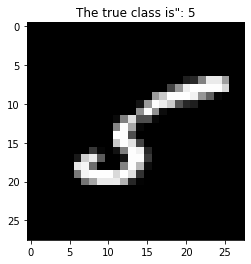

In [ ]:
i = np.random.randint(100)
plt.imshow(np.reshape(np.array(df_train.iloc[i,1:]), (-1,28)), cmap = 'gray')
plt.title('The true class is": %i' %df_train.iloc[i, 0])
plt.show()

### Split data

In [ ]:
X_train = df_train[df_train.columns[1:]]
y_train = df_train['label'] 
X_test = df_test[df_test.columns[1:]] 
y_test = df_test['label']

In [ ]:
X_train.shape


(2867, 784)

### Preparation

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### SVM

In [ ]:
rbf_svm = svm.SVC(kernel='rbf', C=10, gamma=0.01)
rbf_svm.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

### Predict

In [ ]:
y_pred = rbf_svm.predict(X_test)

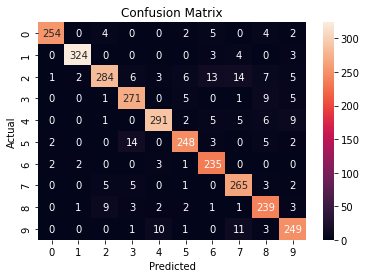

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Accuracy on test set
accuracy_score(y_pred, y_test)

0.9200968523002422

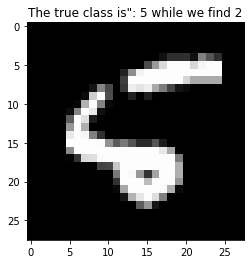

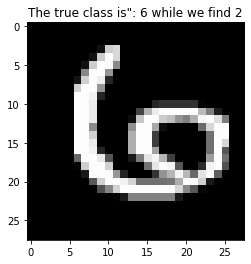

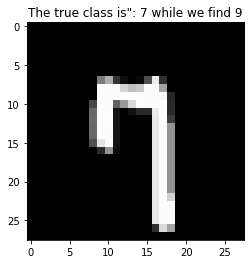

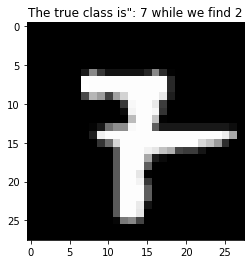

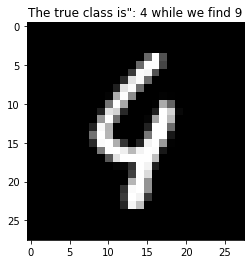

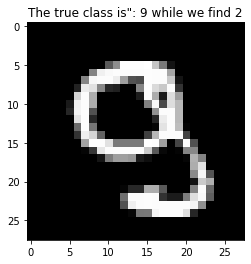

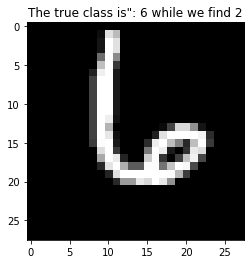

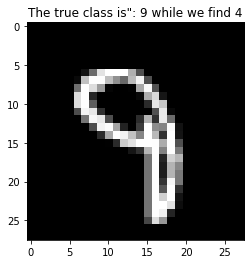

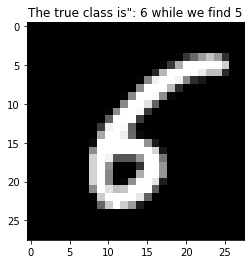

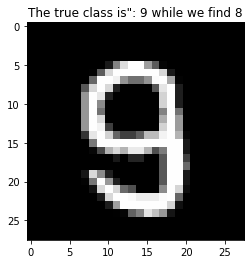

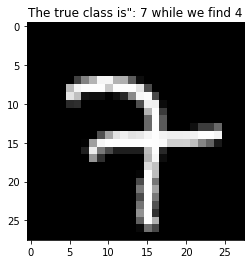

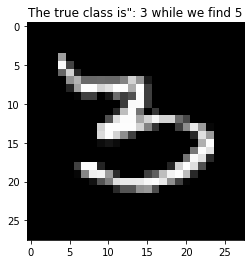

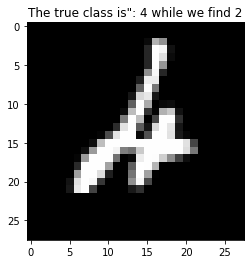

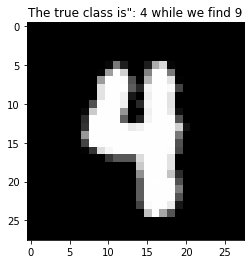

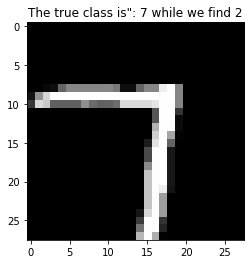

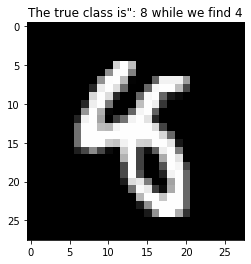

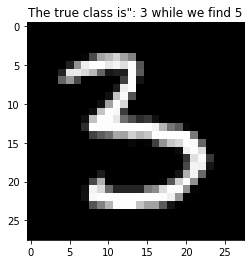

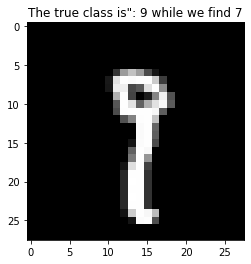

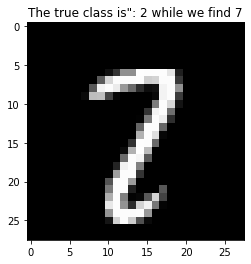

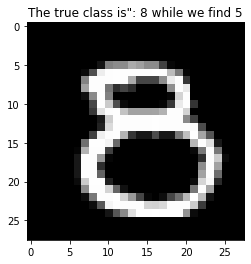

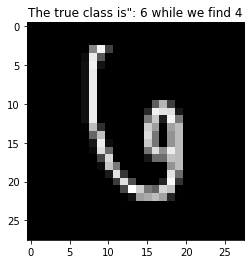

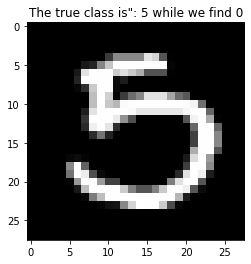

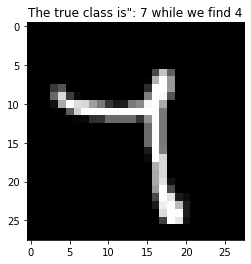

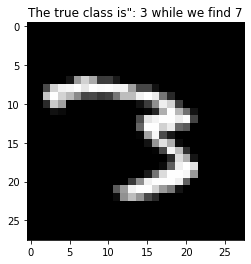

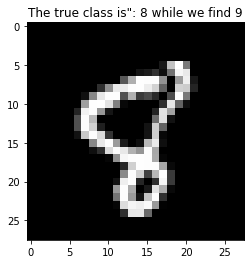

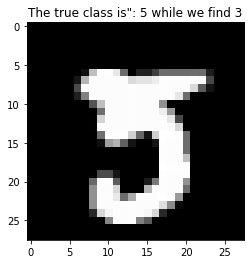

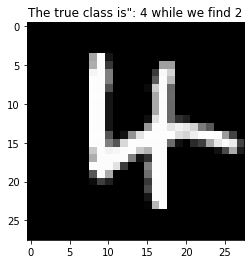

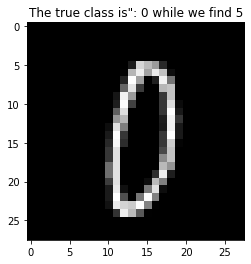

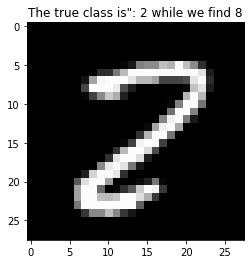

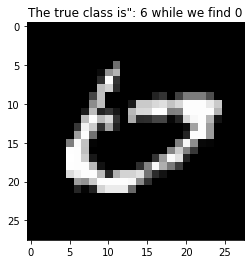

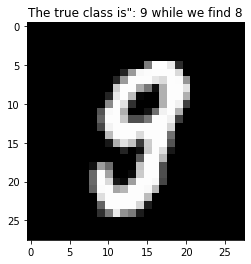

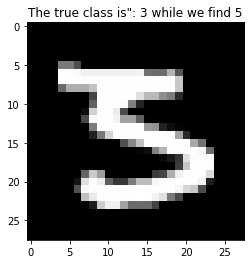

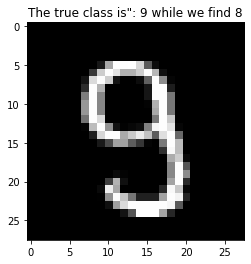

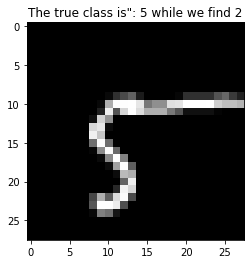

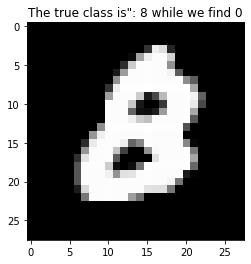

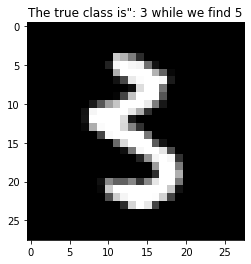

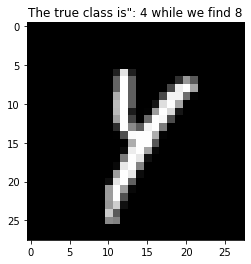

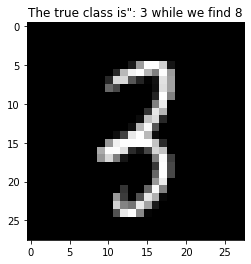

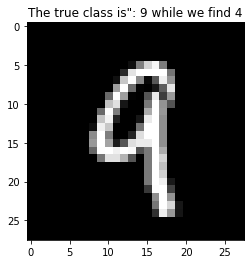

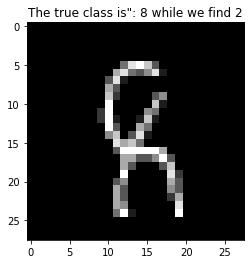

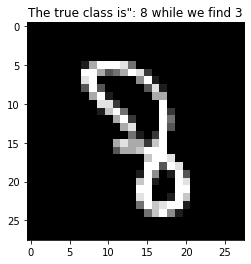

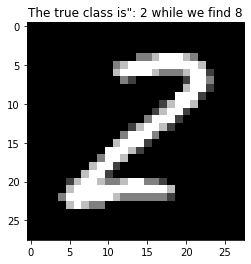

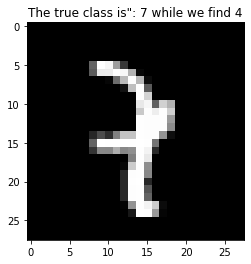

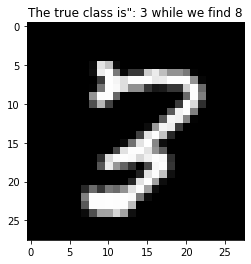

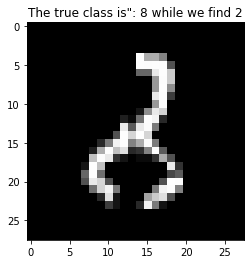

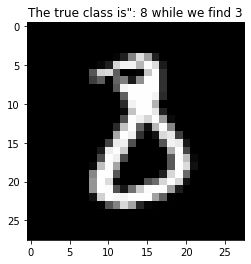

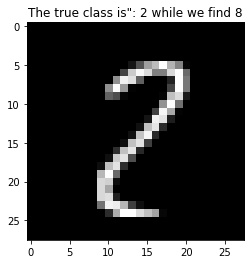

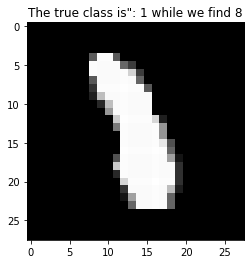

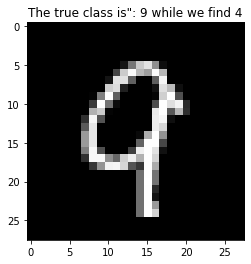

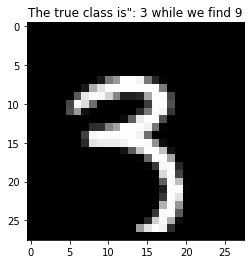

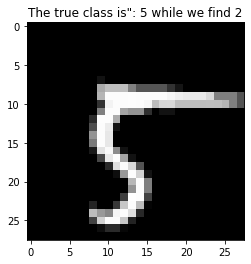

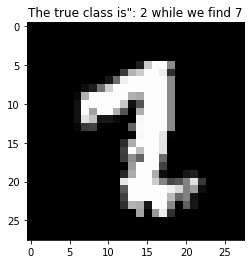

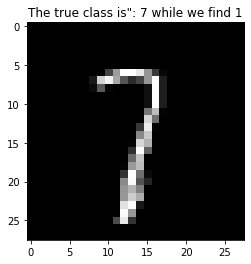

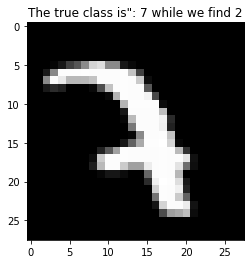

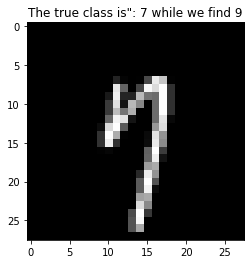

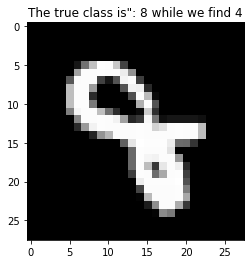

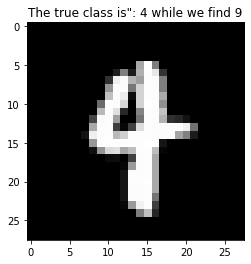

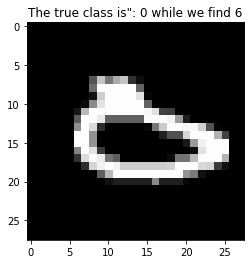

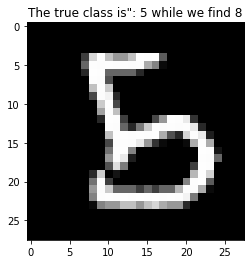

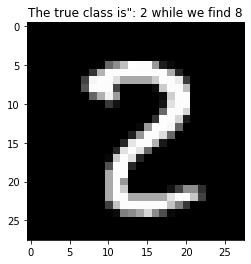

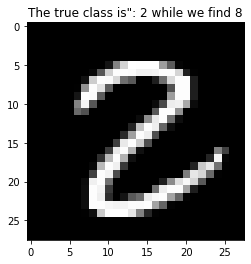

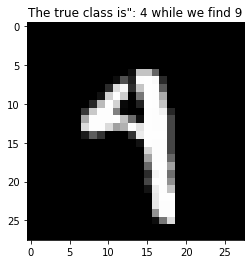

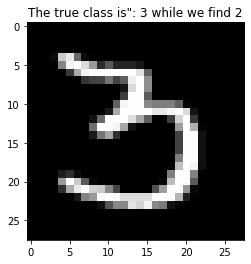

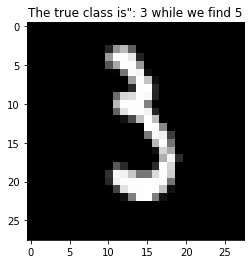

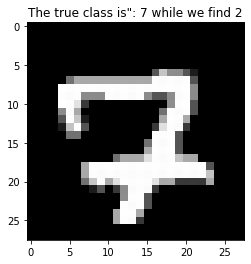

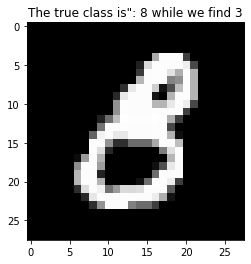

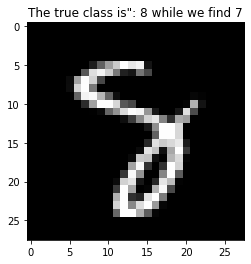

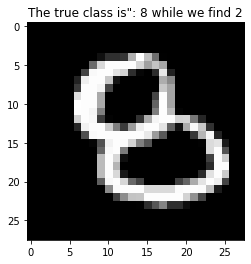

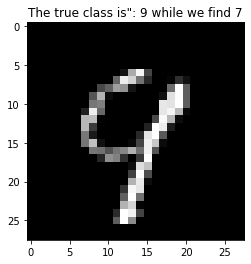

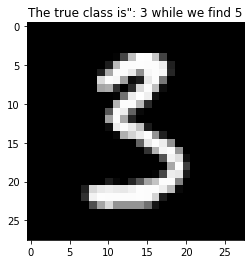

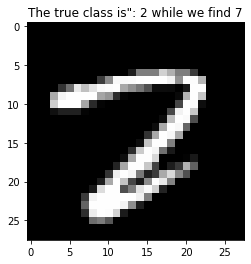

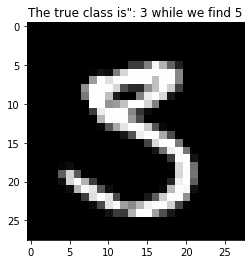

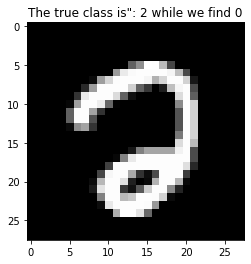

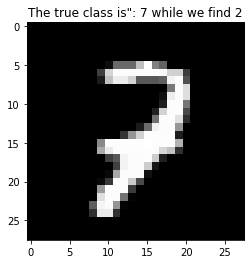

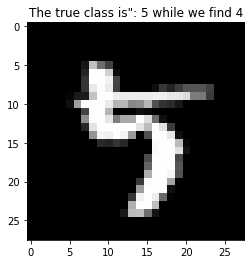

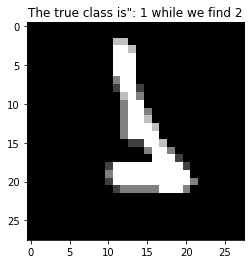

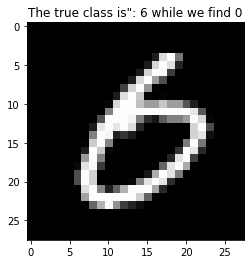

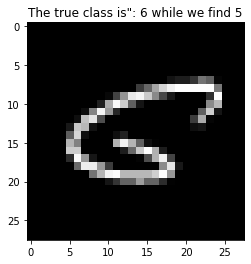

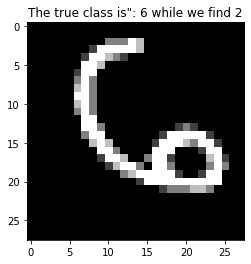

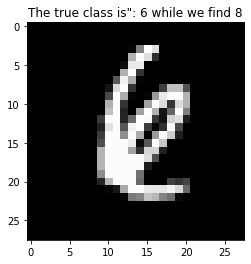

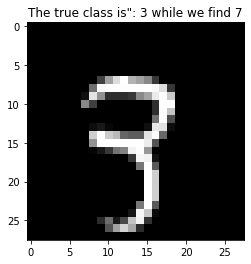

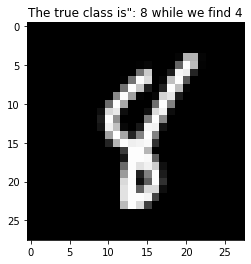

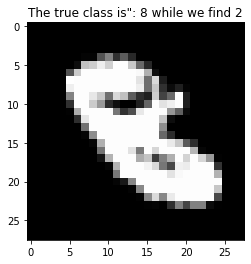

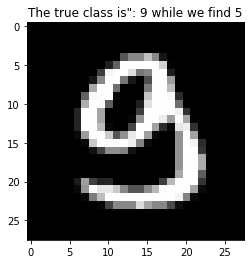

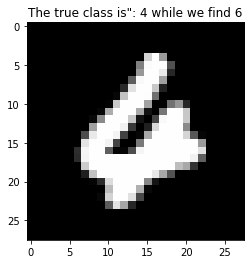

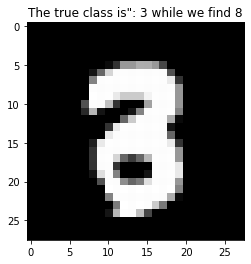

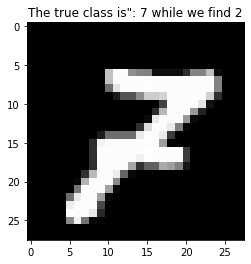

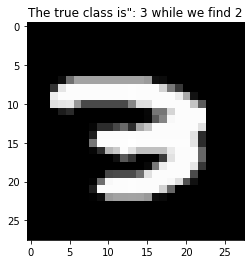

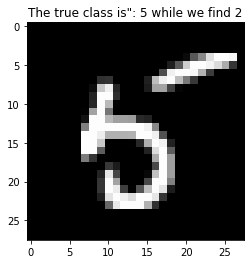

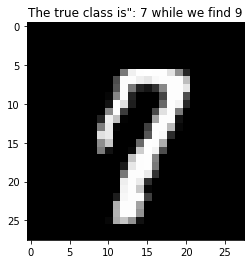

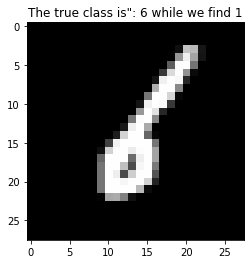

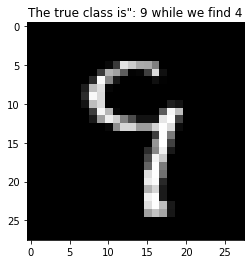

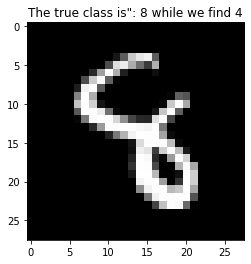

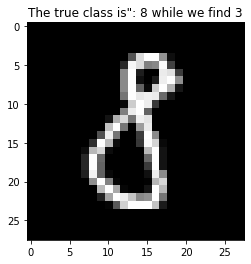

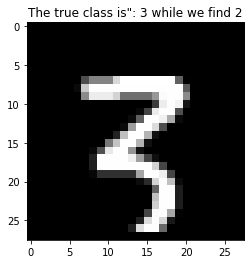

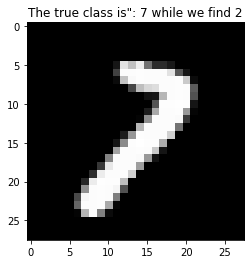

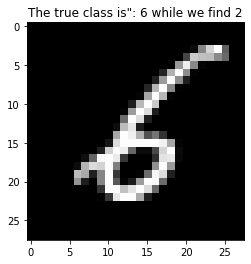

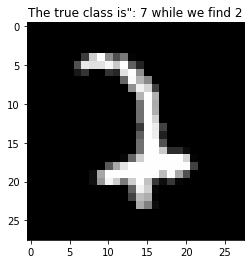

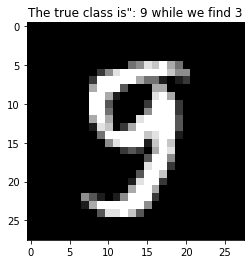

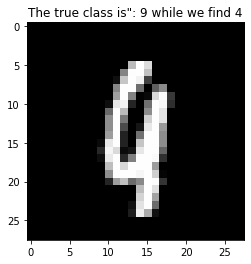

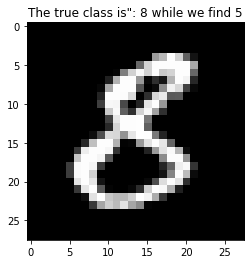

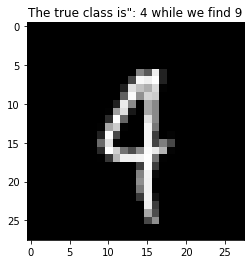

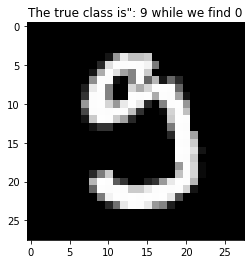

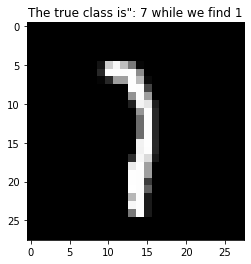

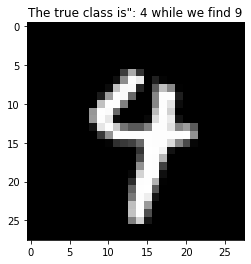

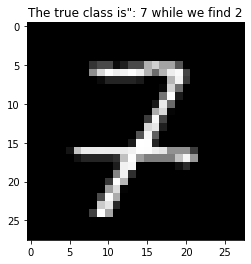

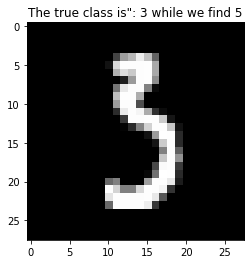

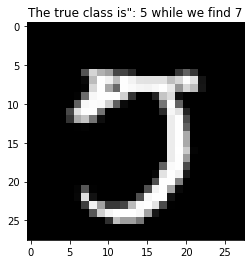

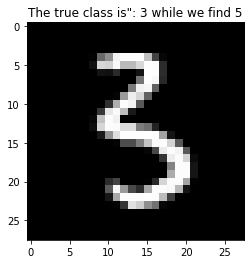

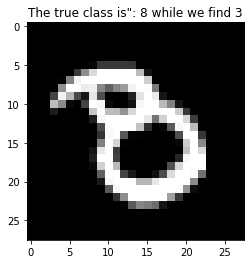

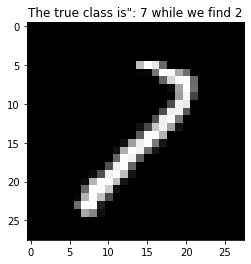

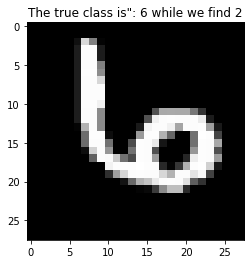

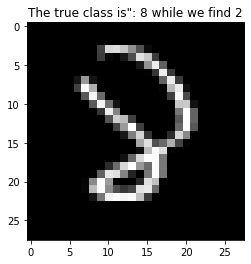

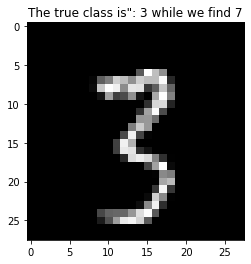

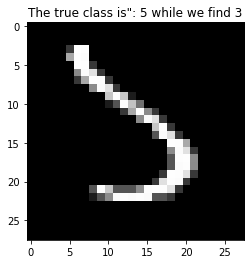

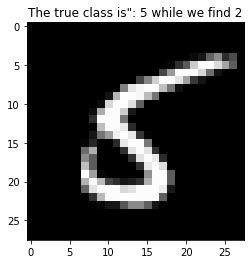

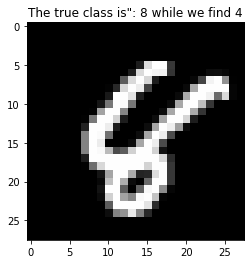

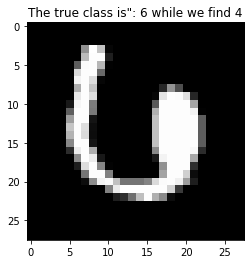

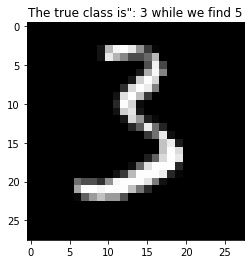

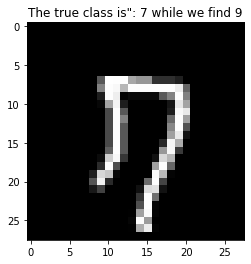

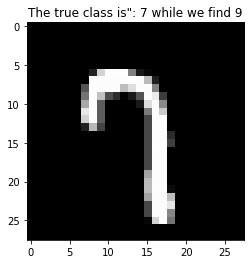

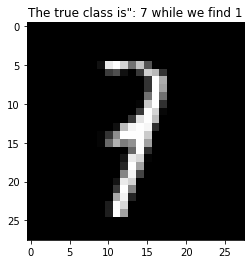

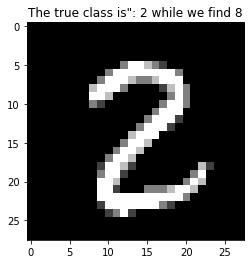

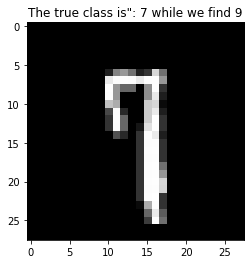

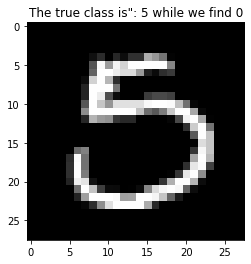

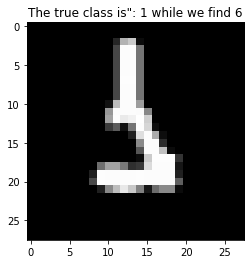

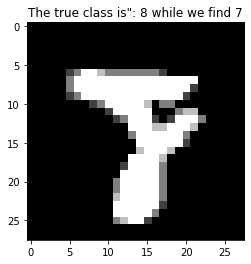

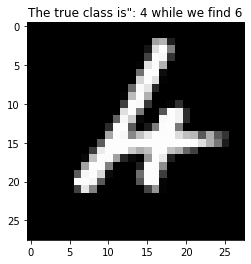

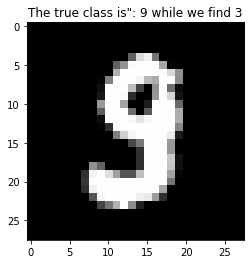

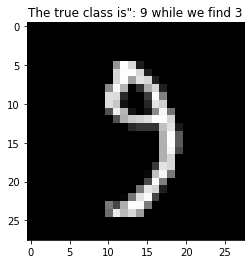

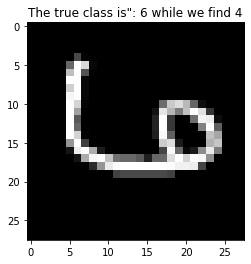

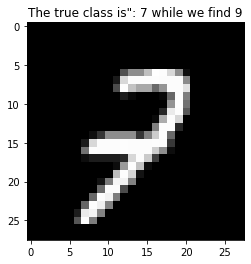

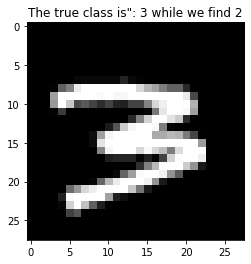

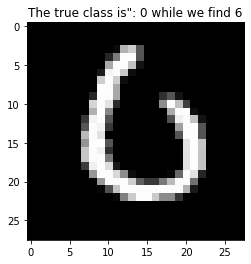

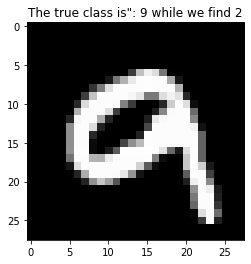

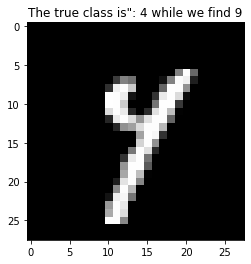

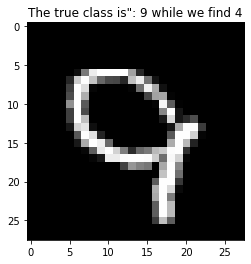

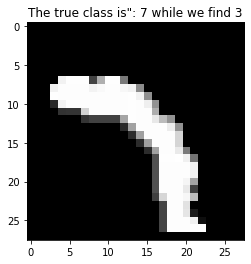

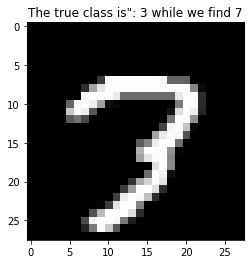

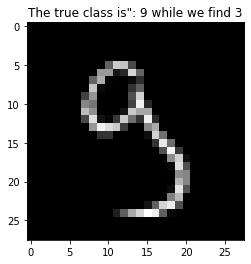

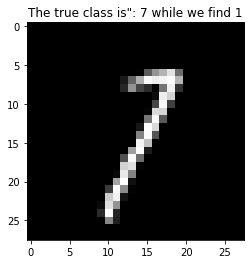

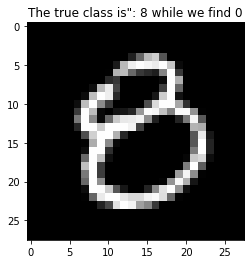

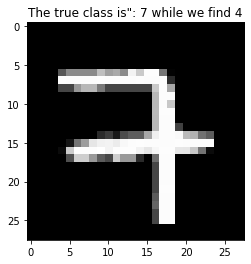

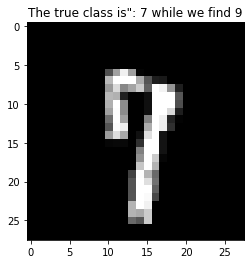

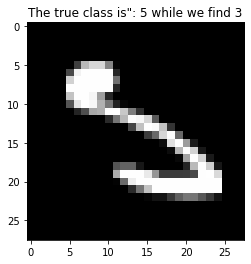

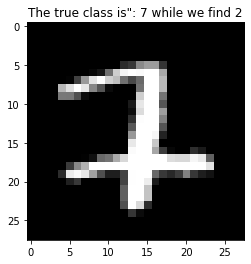

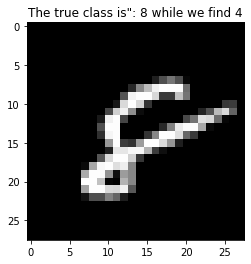

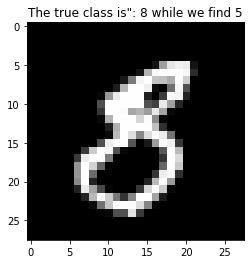

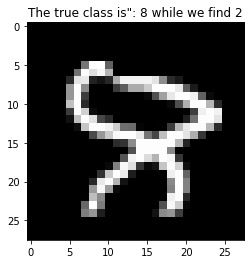

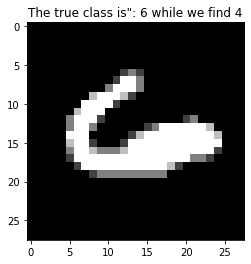

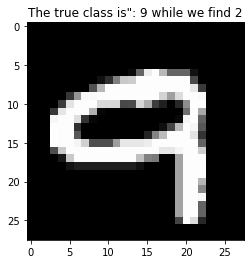

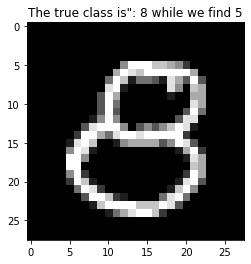

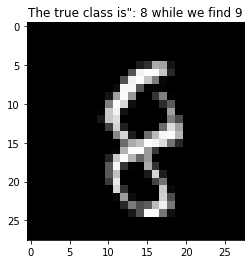

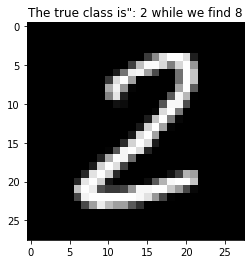

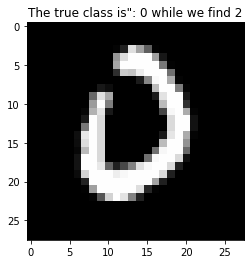

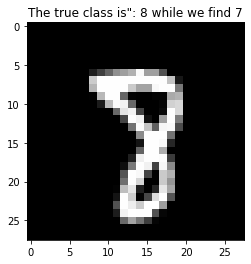

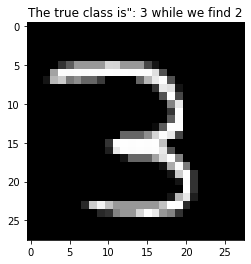

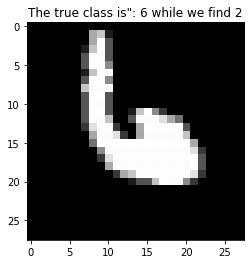

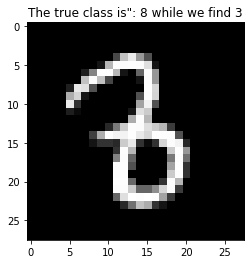

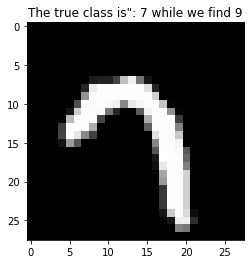

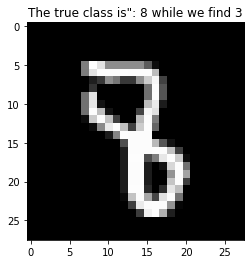

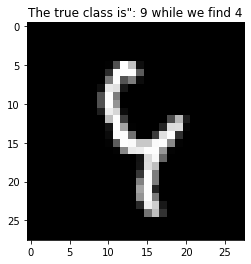

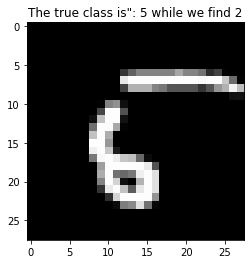

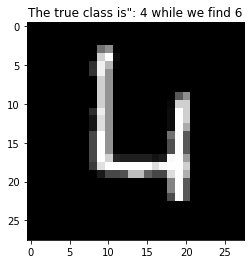

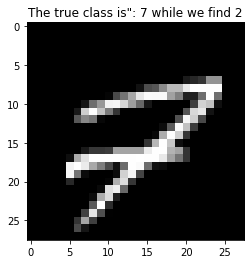

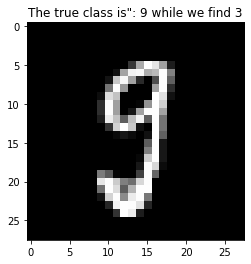

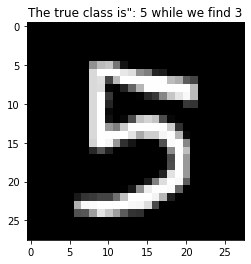

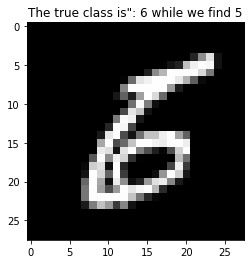

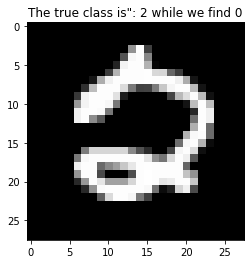

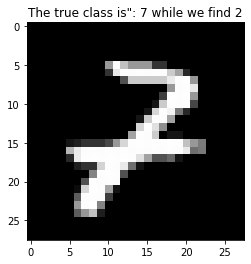

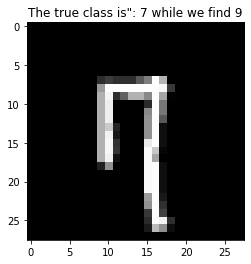

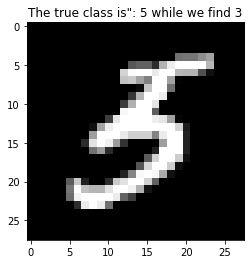

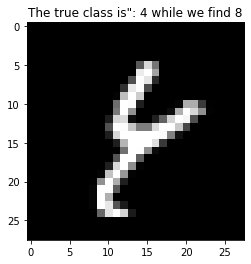

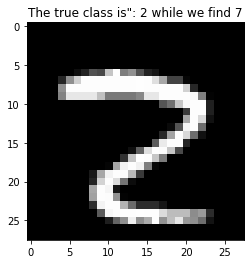

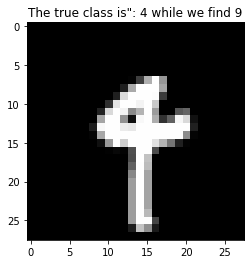

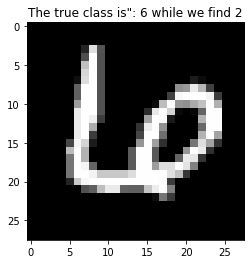

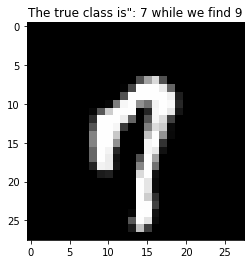

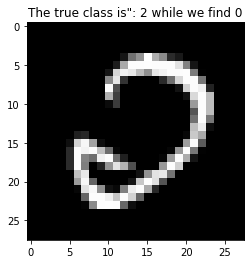

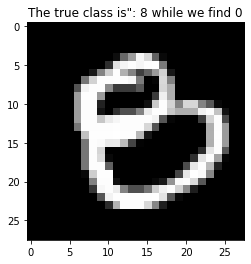

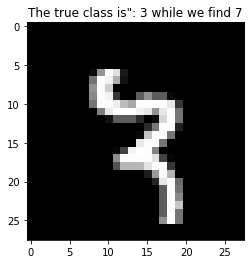

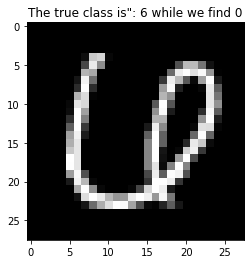

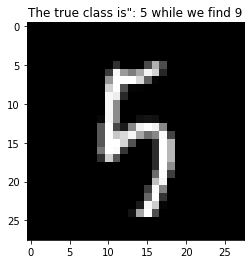

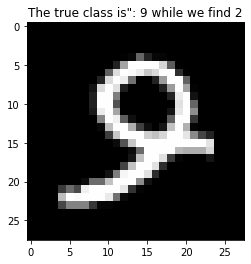

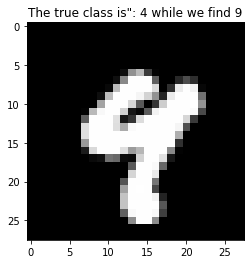

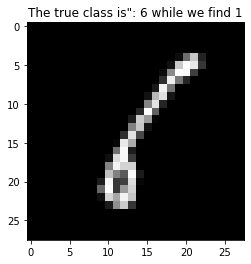

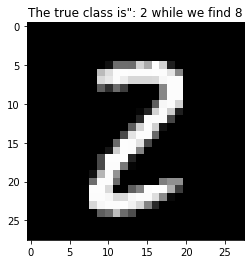

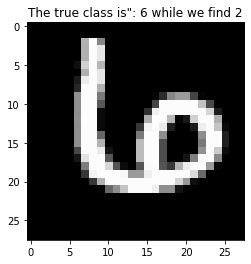

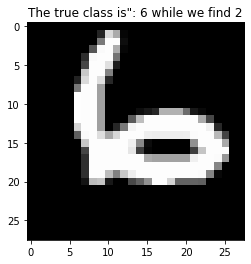

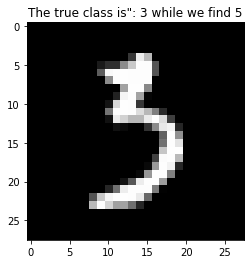

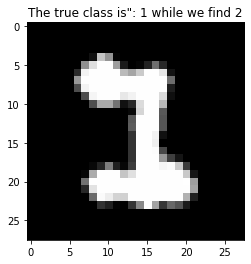

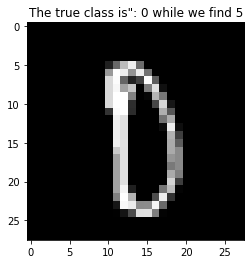

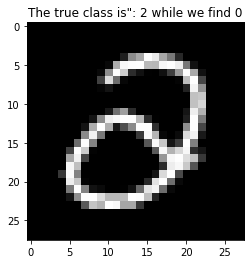

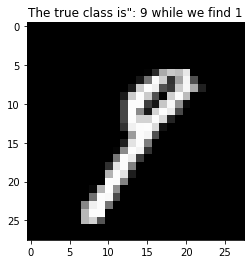

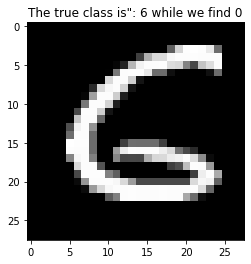

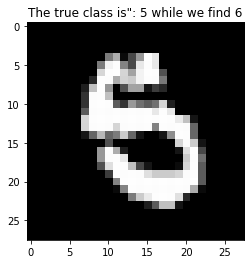

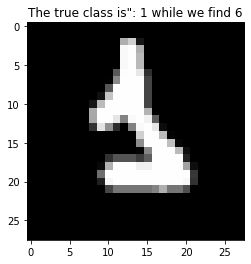

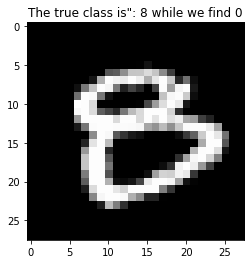

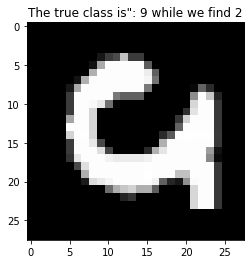

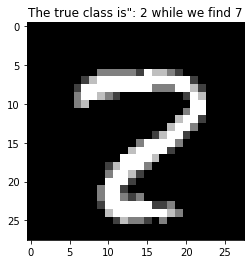

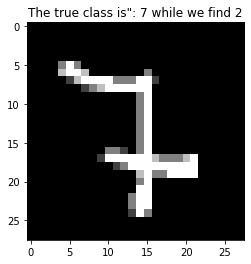

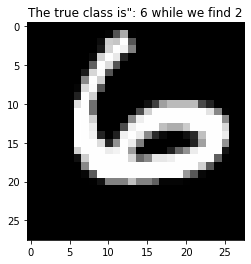

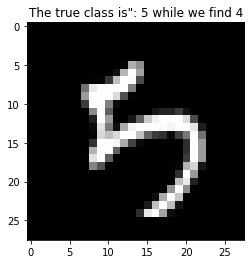

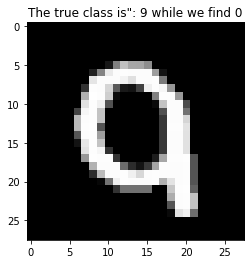

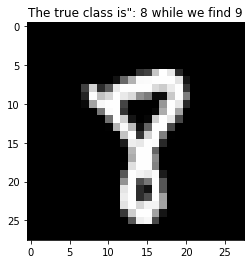

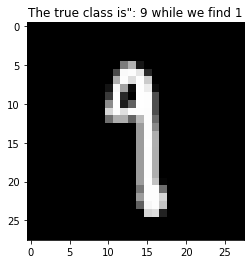

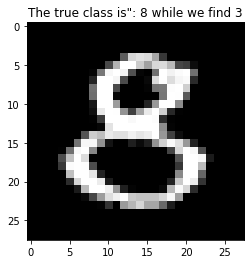

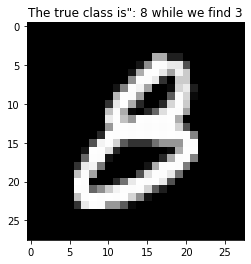

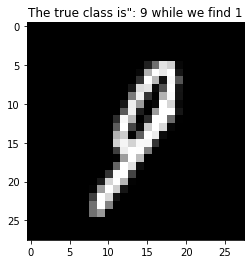

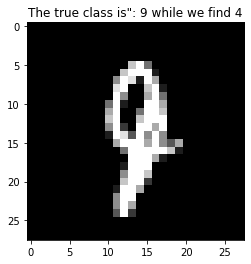

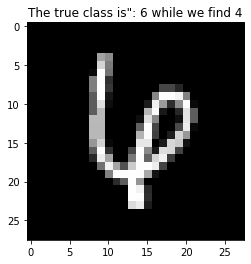

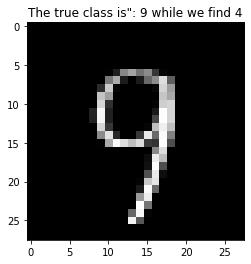

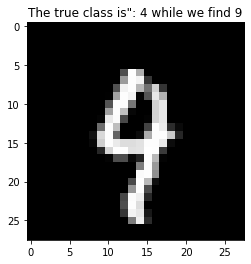

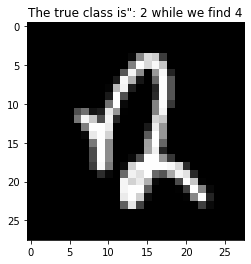

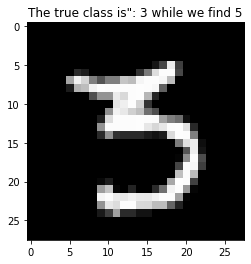

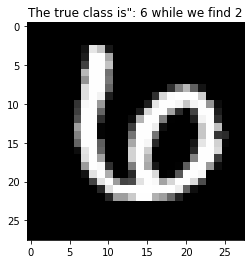

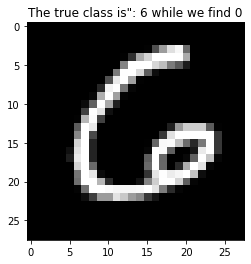

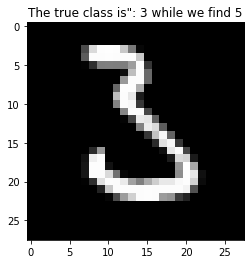

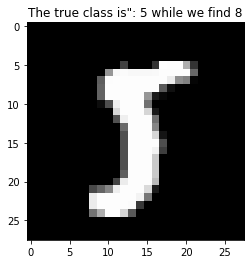

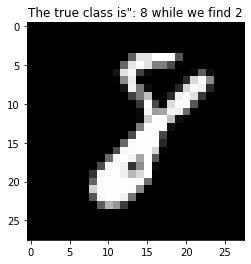

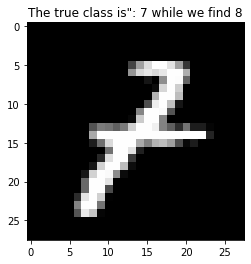

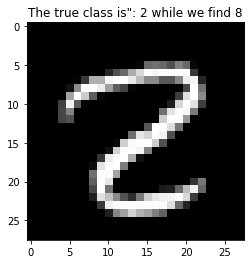

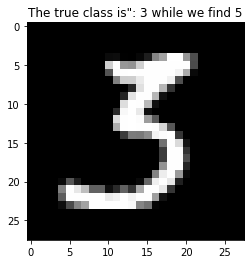

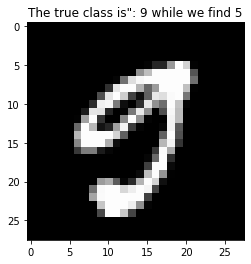

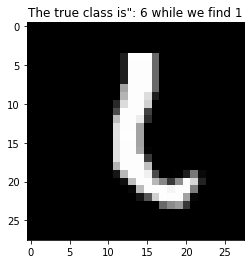

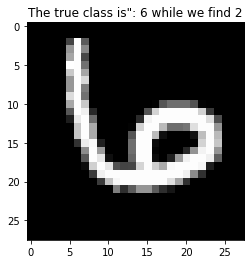

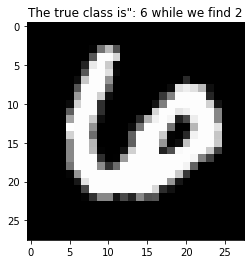

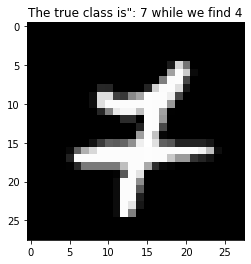

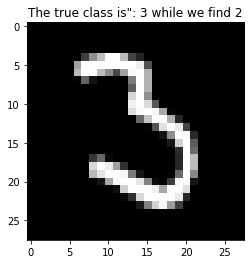

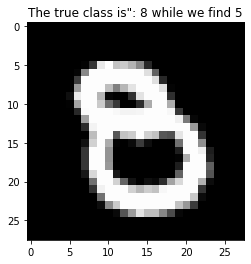

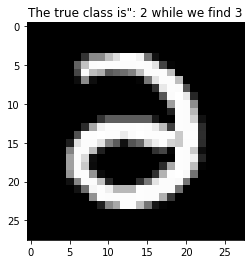

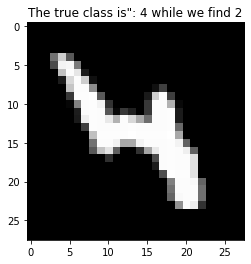

In [ ]:
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        instance = i
        
        plt.imshow(np.reshape(np.array(df_test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
        plt.title('The true class is": %i while we find %i' % (y_test[instance], y_pred[instance]))
        plt.show()

## 2/ Applying PCA to reduce dimesion and then use SVM to train

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
pca.fit(train_img)

PCA(n_components=0.95)

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
# rbf_svm = svm.SVC(kernel='rbf', C=3, gamma=0.1)
rbf_svm = svm.SVC(kernel='rbf')

rbf_svm.fit(train_img, train_lbl)
y_pred = rbf_svm.predict(test_img)

In [ ]:
np.mean(y_pred == test_lbl)

0.9673

##3/ Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
preds = logisticRegr.predict(test_img)


0.9201

In [ ]:
logisticRegr.score(test_img, test_lbl)

0.9201

##4/ CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
size = 50000
X_val, y_val = X_train[size:, :, :], y_train[size:]
X_train, y_train = X_train[:size, :, :], y_train[:size] 

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((50000, 28, 28), (50000,), (10000, 28, 28), (10000,))

In [ ]:
X_train = X_train. reshape(X_train. shape[0], 28, 28, 1)
X_val = X_val. reshape(X_val. shape[0], 28, 28, 1)
X_test = X_test. reshape(X_test. shape[0], 28, 28, 1)

In [ ]:
Y_train = np_utils. to_categorical(y_train, 10)
Y_val = np_utils. to_categorical(y_val, 10)
Y_test = np_utils. to_categorical(y_test, 10)
print(' Dữ liệu y ban đầu ' , y_train[0])
print(' Dữ liệu y sau one-hot encoding ' ,Y_train[0])

 Dữ liệu y ban đầu  5
 Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation="sigmoid", input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation="sigmoid"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, 
                    validation_data=(X_val, Y_val),
                    epochs=10,
                    batch_size=32,
                    verbose=1)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0680 - accuracy: 0.9805 - val_loss: 0.0578 - val_accuracy: 0.9844
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0409 - accuracy: 0.9880 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0284 - accuracy: 0.9919 - val_loss: 0.0519 - val_accuracy: 0.9848
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0205 - accuracy: 0.9942 - val_loss: 0.0476 - val_accuracy: 0.9867
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.0400 - val_accuracy: 0.9879
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0100 - accuracy: 0.9976 - val_loss: 0.0411 - val_accuracy: 0.9890
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0411 - val_accur

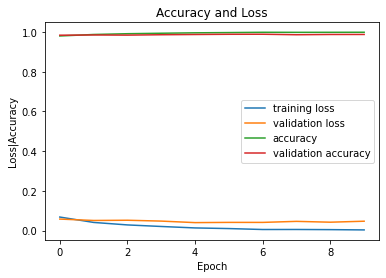

In [ ]:
fig = plt.figure()
numOfEpoch= 10
plt.plot(np.arange(0, numOfEpoch), history.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), history.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), history.history['accuracy'], label='accuracy' )
plt.plot(np.arange(0, numOfEpoch), history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss' )
plt.xlabel('Epoch' )
plt.ylabel('Loss|Accuracy' )
plt.legend()


In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0427 - accuracy: 0.9873


[0.04272148385643959, 0.9872999787330627]

 Giá trị dự đoán:  7


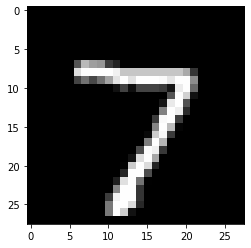

In [ ]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray' )
y_predict = model.predict(X_test[0].reshape(1, 28, 28, 1))
print(' Giá trị dự đoán: ' , np.argmax(y_predict))

##5/ RNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
sample, sample_label = x_test[0], y_test[0]

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
model = keras.Sequential()
model.add(layers.SimpleRNN(64, input_shape=(None, 28)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

In [ ]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), batch_size=64, epochs=1)

938/938 [==============================] - 19s 20ms/step - loss: 0.6660 - accuracy: 0.7967 - val_loss: 0.4067 - val_accuracy: 0.8790
